# Import all the Dependencies

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf

In [26]:
new_model=Sequential()

In [28]:
# step 1 convolution
new_model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [29]:
#Step 2 pooling

new_model.add(MaxPooling2D(pool_size=(2,2)))

In [30]:

#Step 2 pooling

new_model.add(MaxPooling2D(pool_size=(2,2)))


In [31]:
# flattening

new_model.add(Flatten())

In [32]:
# step 4 Full connection

new_model.add(Dense(units=128, activation='relu'))
new_model.add(Dense(units=128, activation='sigmoid'))

In [33]:
#compiling the cnn()
new_model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Model Summary

In [34]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               102528    
                                                                 
 dense_3 (Dense)             (None, 128)              

# Building and Compiling the Model

In [35]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Cucumber plant diseases dataset\training',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\Cucumber plant diseases dataset\testing',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 469 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


# Fitting Model

In [40]:
r=new_model.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=50,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Epoch 1/50
15/15 [==============================] - 53s 4s/step - loss: 0.3083 - accuracy: 0.8806 - val_loss: 0.3752 - val_accuracy: 0.8378
Epoch 2/50
15/15 [==============================] - 53s 4s/step - loss: 0.3107 - accuracy: 0.8763 - val_loss: 0.3650 - val_accuracy: 0.8333
Epoch 3/50
15/15 [==============================] - 53s 4s/step - loss: 0.3409 - accuracy: 0.8657 - val_loss: 0.4526 - val_accuracy: 0.7658
Epoch 4/50
15/15 [==============================] - 53s 4s/step - loss: 0.3432 - accuracy: 0.8443 - val_loss: 0.3610 - val_accuracy: 0.8243
Epoch 5/50
15/15 [==============================] - 53s 4s/step - loss: 0.3041 - accuracy: 0.8870 - val_loss: 0.3559 - val_accuracy: 0.8468
Epoch 6/50
15/15 [==============================] - 53s 4s/step - loss: 0.2946 - accuracy: 0.9019 - val_loss: 0.3709 - val_accuracy: 0.8333
Epoch 7/50
15/15 [==============================] - 52s 4s/step - loss: 0.2857 - accuracy: 0.8998 - val_loss: 0.3732 - val_accuracy: 0.8333
Epoch 8/50
15/15 [==

# Saving Model

In [45]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\Cucumber_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\Cucumber_model.h5')

# Plotting

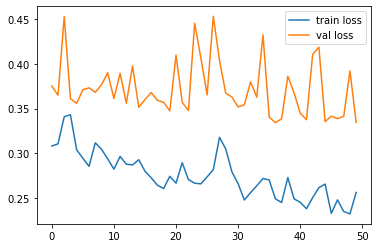

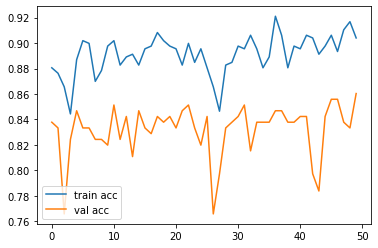

<Figure size 432x288 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Defining Classes

In [47]:
training_set.class_indices

{'Ill_cucumber': 0, 'good_Cucumber': 1}

In [48]:
class_names = list(training_set.class_indices.keys())
class_names

['Ill_cucumber', 'good_Cucumber']

In [49]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.5254902  0.5568628  0.5647059 ]
  [0.5254902  0.5568628  0.5647059 ]
  [0.5254902  0.5568628  0.5647059 ]
  ...
  [0.5882353  0.5921569  0.6117647 ]
  [0.5882353  0.5921569  0.6117647 ]
  [0.5882353  0.5921569  0.6117647 ]]

 [[0.5254902  0.5568628  0.5647059 ]
  [0.5254902  0.5568628  0.5647059 ]
  [0.5254902  0.5568628  0.5647059 ]
  ...
  [0.5882353  0.5921569  0.6117647 ]
  [0.5882353  0.5921569  0.6117647 ]
  [0.5882353  0.5921569  0.6117647 ]]

 [[0.50558597 0.5347469  0.5440644 ]
  [0.50558597 0.5347469  0.5440644 ]
  [0.50558597 0.5347469  0.5440644 ]
  ...
  [0.6044536  0.6083752  0.6272459 ]
  [0.6044536  0.6083752  0.6272459 ]
  [0.6044536  0.6083752  0.6272459 ]]

 ...

 [[0.35538837 0.60097283 0.43381974]
  [0.35538837 0.60097283 0.43381974]
  [0.35538837 0.60097283 0.43381974]
  ...
  [0.3377565  0.34167808 0.34952122]
  [0.3377565  0.34167808 0.34952122]
  [0.3377565  0.34167808 0.34952122]]

 [[0.35686275 0.6039216  0.43529415]
  [0.35686275 0.6039216  0.43529415]


# Run prediction on a sample image

first image to predict
actual label: Ill_cucumber
1/1 [==============================] - 0s 179ms/step
predicted label: Ill_cucumber


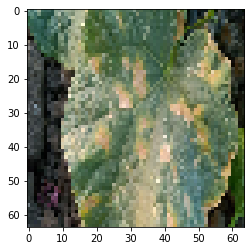

In [50]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break